In [3]:
import pandas as pd
gdf=pd.read_csv('data.csv')

In [4]:
gdf.head()

,District,longitude,lattitude,Schools_Feeleying,Schools_Nonfeeleying,Schools_Special education,Schools_Total,Students_Male,Students_Female,Students_Total,Teachers_Male,Teachers_Female,Teachers_Total
0,Colombo,6.93548,79.84868,14,16,4,34,35706,30904,66610,619,2658,3277
1,Gampaha,7.0897,79.99250,5,6,3,14,11174,10936,22110,220,750,970
2,Kalutara,6.5831,79.95930,3,4,3,11,3400,4738,8138,50,292,342
3,Kandy,7.2955,80.63560,1,7,1,9,6386,4074,10460,135,473,608
4,Matale,7.4698,80.62170,1,0,1,2,76,938,1014,5,45,50


In [5]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   18 non-null     object 
 1   longitude                  18 non-null     object 
 2   lattitude                  18 non-null     float64
 3   Schools_Feeleying          18 non-null     int64  
 4   Schools_Nonfeeleying       18 non-null     int64  
 5   Schools_Special education  18 non-null     int64  
 6   Schools_Total              18 non-null     int64  
 7   Students_Male              18 non-null     int64  
 8   Students_Female            18 non-null     int64  
 9   Students_Total             18 non-null     int64  
 10  Teachers_Male              18 non-null     int64  
 11  Teachers_Female            18 non-null     int64  
 12  Teachers_Total             18 non-null     int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 2.

In [6]:
gdf.describe()

,lattitude,Schools_Feeleying,Schools_Nonfeeleying,Schools_Special education,Schools_Total,Students_Male,Students_Female,Students_Total,Teachers_Male,Teachers_Female,Teachers_Total
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,80.508326,2.000000,2.333333,1.388889,5.777778,3781.500000,3459.833333,7241.333333,74.666667,276.277778,350.944444
std,0.523569,3.360672,4.043877,0.978528,8.011430,8505.116054,7395.057541,15851.369887,149.492868,626.020372,773.229322
min,79.848680,0.000000,0.000000,0.000000,1.000000,28.000000,7.000000,43.000000,1.000000,7.000000,8.000000
25%,80.059815,0.000000,0.000000,1.000000,2.000000,102.000000,164.750000,433.500000,6.250000,17.500000,25.250000
50%,80.408330,1.000000,0.500000,1.000000,2.000000,447.500000,604.000000,1073.000000,10.500000,50.500000,63.000000
75%,80.746045,2.750000,2.750000,1.000000,6.750000,3174.000000,3932.250000,7351.750000,55.250000,201.750000,311.500000
max,81.692400,14.000000,16.000000,4.000000,34.000000,35706.000000,30904.000000,66610.000000,619.000000,2658.000000,3277.000000


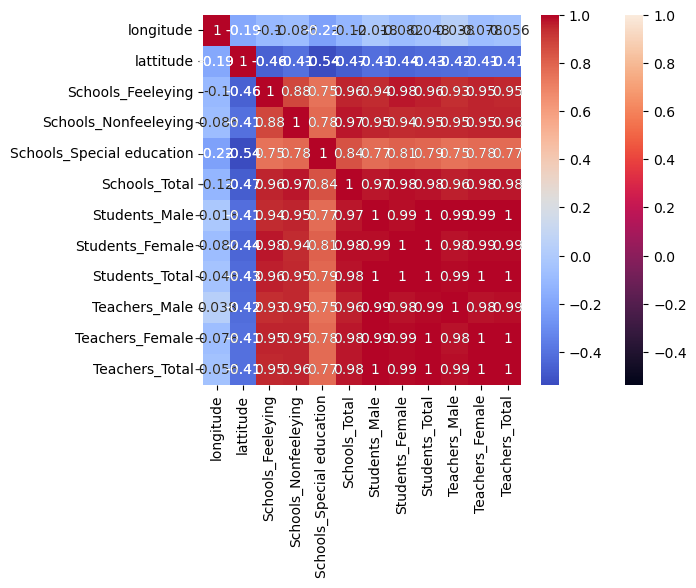

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = gdf.drop('District', axis=1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


!pip install -U pysal
!pip install -U esda
!pip install -U libpysal


C:\Users\sachi\AppData\Local\Temp\ipykernel_8332\1297814902.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Schools_Total_scaled'] = scaler.fit_transform(subset_data[['Schools_Total']])
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warn

Cluster Centers:
[[ 1.91666667]
 [34.        ]
 [ 9.4       ]]


C:\Users\sachi\AppData\Local\Temp\ipykernel_8332\1297814902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['cluster'] = kmeans.fit_predict(subset_data[['Schools_Total_scaled']])


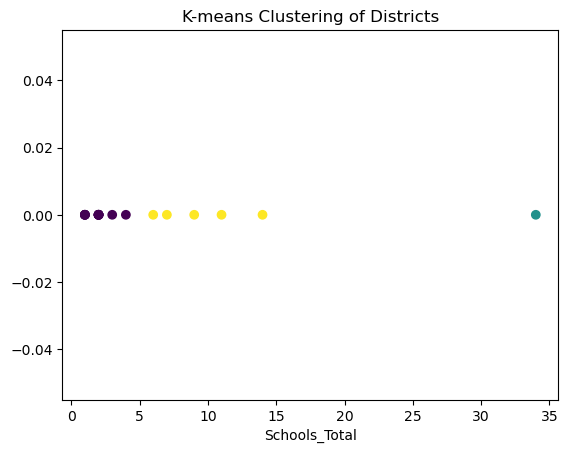

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data=gdf
# Assuming 'District' is the column containing district names and 'Schools_Total' is the variable for clustering
# You can choose other columns based on your analysis requirements
subset_data = data[['District', 'Schools_Total']]


# Standardize the data
scaler = StandardScaler()
subset_data['Schools_Total_scaled'] = scaler.fit_transform(subset_data[['Schools_Total']])

# Select the number of clusters (you need to determine the optimal number)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(subset_data[['Schools_Total_scaled']])

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters
plt.scatter(subset_data['Schools_Total'], [0] * len(subset_data), c=subset_data['cluster'], cmap='viridis')
plt.xlabel('Schools_Total')
plt.title('K-means Clustering of Districts')
plt.show()


C:\Users\sachi\AppData\Local\Temp\ipykernel_8332\3792607776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Teachers_Total_scaled'] = scaler.fit_transform(subset_data[['Teachers_Total']])
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  wa

Cluster Centers:
[[  97.46666667]
 [3277.        ]
 [ 789.        ]]


C:\Users\sachi\AppData\Local\Temp\ipykernel_8332\3792607776.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['cluster'] = kmeans.fit_predict(subset_data[['Teachers_Total_scaled']])


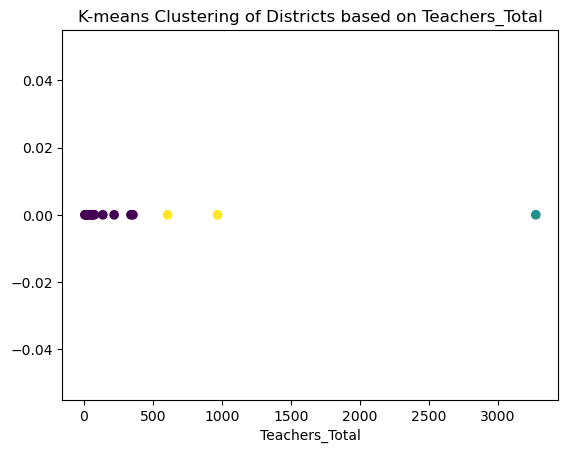

In [13]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'District' is the column containing district names and 'Teachers_Total' is the variable for clustering
# You can choose other columns based on your analysis requirements
subset_data = data[['District', 'Teachers_Total']]

# Standardize the data
scaler = StandardScaler()
subset_data['Teachers_Total_scaled'] = scaler.fit_transform(subset_data[['Teachers_Total']])

# Select the number of clusters (you need to determine the optimal number)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(subset_data[['Teachers_Total_scaled']])

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters
plt.scatter(subset_data['Teachers_Total'], [0] * len(subset_data), c=subset_data['cluster'], cmap='viridis')
plt.xlabel('Teachers_Total')
plt.title('K-means Clustering of Districts based on Teachers_Total')
plt.show()


C:\Users\sachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


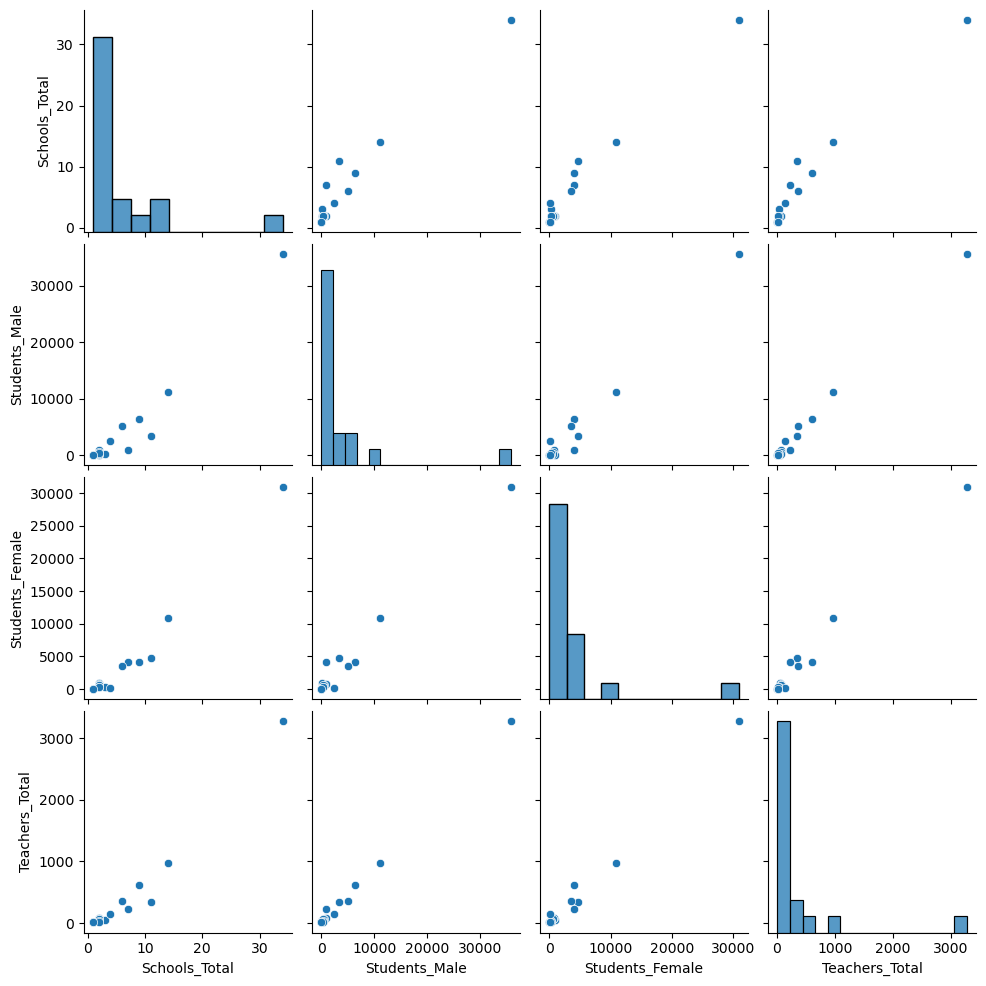

In [14]:
import seaborn as sns

# Select relevant columns for pair plots
selected_columns_for_pairplots = ['Schools_Total', 'Students_Male', 'Students_Female', 'Teachers_Total']

# Create a subset of data with selected columns
subset_data_pairplots = data[selected_columns_for_pairplots]

# Create pair plots
sns.pairplot(subset_data_pairplots)
plt.show()


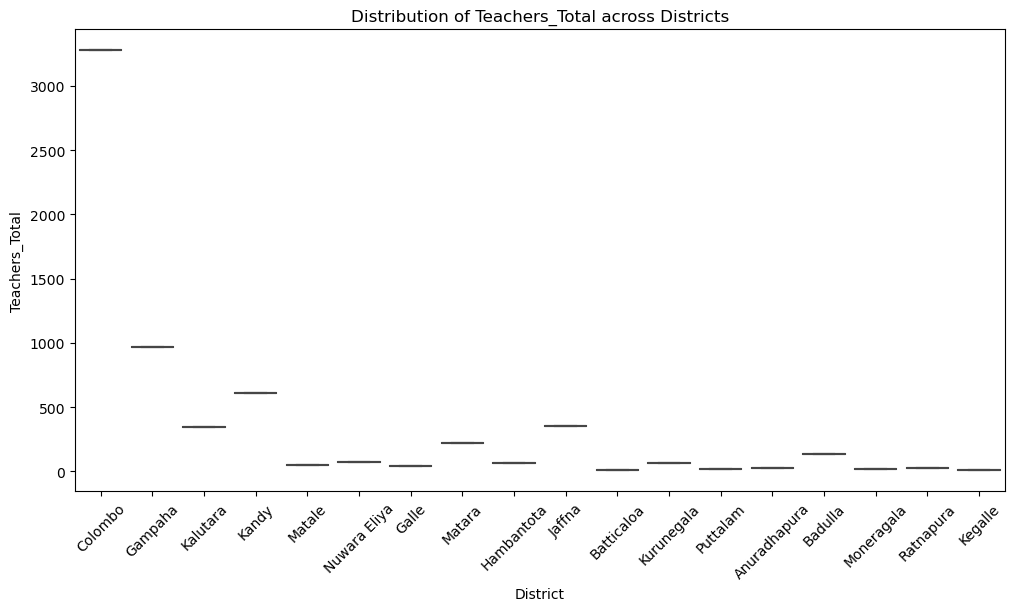

In [15]:
# Select relevant columns for box plots
selected_columns_for_boxplots = ['District', 'Teachers_Total']

# Create a subset of data with selected columns
subset_data_boxplots = data[selected_columns_for_boxplots]

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='District', y='Teachers_Total', data=subset_data_boxplots)
plt.xticks(rotation=45)
plt.title('Distribution of Teachers_Total across Districts')
plt.show()


# part 2

In [16]:
import pandas as pd
from pysal.model import spreg
from pysal.explore import esda


C:\Users\sachi\anaconda3\Lib\site-packages\spaghetti\network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [31]:
data=pd.read_csv('data.csv')
data

,District,longitude,lattitude,Schools_Feeleying,Schools_Nonfeeleying,Schools_Special education,Schools_Total,Students_Male,Students_Female,Students_Total,Teachers_Male,Teachers_Female,Teachers_Total
0,Colombo,6.94,79.85,14.0,16.0,4.0,34.0,35706.0,30904.0,66610.0,619.0,2658.0,3277.0
1,Gampaha,7.09,79.99,5.0,6.0,3.0,14.0,11174.0,10936.0,22110.0,220.0,750.0,970.0
2,Kalutara,6.58,79.96,3.0,4.0,3.0,11.0,3400.0,4738.0,8138.0,50.0,292.0,342.0
3,Kandy,7.30,80.64,1.0,7.0,1.0,9.0,6386.0,4074.0,10460.0,135.0,473.0,608.0
4,Matale,7.47,80.62,1.0,0.0,1.0,2.0,76.0,938.0,1014.0,5.0,45.0,50.0
5,Nuwara Eliya,6.97,80.78,2.0,0.0,0.0,2.0,997.0,789.0,1786.0,10.0,67.0,77.0
6,Galle,6.04,80.22,0.0,1.0,2.0,3.0,180.0,239.0,419.0,10.0,32.0,42.0
7,Matara,5.95,80.54,4.0,2.0,1.0,7.0,924.0,4069.0,4993.0,25.0,195.0,220.0
8,Hambantota,6.13,81.11,1.0,0.0,1.0,2.0,523.0,609.0,1132.0,22.0,42.0,64.0
9,Jaffna,9.67,80.01,3.0,2.0,1.0,6.0,5131.0,3522.0,8653.0,152.0,204.0,356.0


In [32]:
import pandas as pd
from geopy.distance import geodesic
import folium

# Assuming your data is in a DataFrame named df
df = data  # Make sure to replace 'data' with the actual name of your DataFrame

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return geodesic(point1, point2).km

# Create a new DataFrame for distance matrix
distance_matrix = pd.DataFrame(index=df['District'], columns=df['District'])

# Calculate pairwise distances between districts
for i, row in df.iterrows():
    for j, inner_row in df.iterrows():
        distance_matrix.at[row['District'], inner_row['District']] = calculate_distance(
            (row['lattitude'], row['longitude']),
            (inner_row['lattitude'], inner_row['longitude'])
        )

# Display the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Visualization using Folium
map_center = [df['lattitude'].mean(), df['longitude'].mean()]  # Center the map on the average coordinates

mymap = folium.Map(location=map_center, zoom_start=8)

# Add markers for each district
for index, row in df.iterrows():
    folium.Marker([row['lattitude'], row['longitude']], popup=row['District']).add_to(mymap)

# Display the map
mymap.save("districts_map.html")


Distance Matrix:
District         Colombo     Gampaha    Kalutara       Kandy     Matale  \
District                                                                  
Colombo              0.0   15.904899   14.160612   88.474855  86.562591   
Gampaha        15.904899         0.0   10.465677   72.687359  70.708773   
Kalutara       14.160612   10.465677         0.0   77.127937  75.577428   
Kandy          88.474855   72.687359   77.127937         0.0   3.813489   
Matale         86.562591   70.708773   75.577428    3.813489        0.0   
Nuwara Eliya  103.847193   88.241701   91.852081   16.726882  20.015913   
Galle          44.825207   32.643242      30.831   52.407178  51.971967   
Matara         79.310842   65.075093   65.849779   27.061469   29.18435   
Hambantota    141.485319  126.291673  128.677637   56.423314  59.648559   
Jaffna         56.218628   50.080884   60.266742   83.217479  79.662999   
Batticaloa    205.921254  190.148043  194.216833  117.460685  119.55477   
Kurunega

In [42]:
!pip install libpysal

# part 02

C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


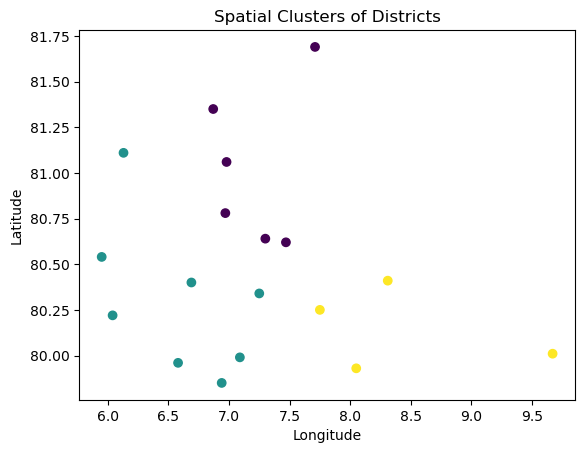

In [48]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'

# Extract the longitude and latitude columns
coordinates = df[['longitude', 'lattitude']]

# Specify the number of clusters (you can adjust this based on your requirements)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(coordinates)

# Visualize the clusters
plt.scatter(df['longitude'], df['lattitude'], c=df['cluster'], cmap='viridis')
plt.title('Spatial Clusters of Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


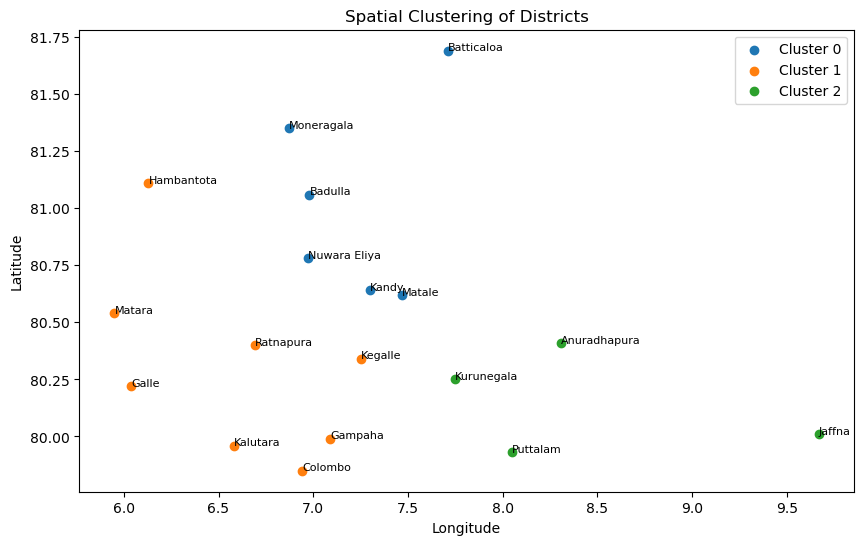

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
# Assuming df is your DataFrame with the district information
# df = pd.read_csv('your_dataset.csv')

# Extract latitude and longitude
X = df[['longitude', 'lattitude']]

# Specify the number of clusters (you can adjust this based on your needs)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['lattitude'], label=f'Cluster {cluster}')

# Show district names on the plot
for i in range(len(df)):
    plt.text(df['longitude'][i], df['lattitude'][i], df['District'][i], fontsize=8)

plt.title('Spatial Clustering of Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# part 03

In [62]:
!pip install geopandas folium plotly matplotlib seaborn


C:\Users\sachi\AppData\Local\Temp\ipykernel_17444\3221032592.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


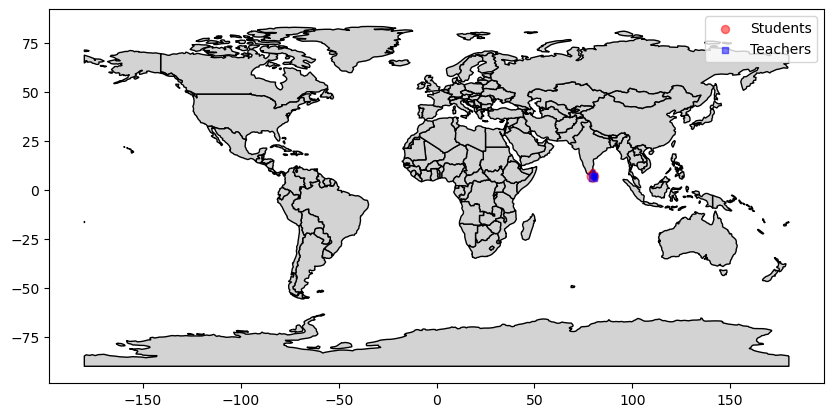

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sachi\anaconda3

  added / updated specs:
    - gdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       h56e8100_0         151 KB  conda-forge
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    expat-2.5.0                |       h63175ca_1         221 KB  conda-forge
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    freexl-1.0.6               |       h2bbff1b_0          51 KB
    gdal-3.6.2                 |  py311h4e7b5b2_3         1.6 MB
    geos-3.8.0                 |       h33f27b4_0         905 KB
    geotiff-1.7.0              |       h4545760_1         133 KB
    hdf4-4.2.13                |       h712560f_2         1.3 MB
    kealib-1.5.0  



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
# Your data (replace this with your actual DataFrame)
data = {
    'District': ['Colombo', 'Gampaha', 'Kalutara', 'Kandy', 'Matale', 'Nuwara Eliya', 'Galle', 'Matara', 'Hambantota', 'Jaffna', 'Batticaloa', 'Kurunegala', 'Puttalam', 'Anuradhapura', 'Badulla', 'Moneragala', 'Ratnapura', 'Kegalle'],
    'Latitude': [6.94, 7.09, 6.58, 7.3, 7.47, 6.97, 6.04, 5.95, 6.13, 9.67, 7.71, 7.75, 8.05, 8.31, 6.98, 6.87, 6.69, 7.25],
    'Longitude': [79.85, 79.99, 79.96, 80.64, 80.62, 80.78, 80.22, 80.54, 81.11, 80.01, 81.69, 80.25, 79.93, 80.41, 81.06, 81.35, 80.4, 80.34],
    'Students_Total': [66610, 22110, 8138, 10460, 1014, 1786, 419, 4993, 1132, 8653, 43, 877, 98, 477, 2643, 92, 717, 82],
    'Teachers_Total': [3277, 970, 342, 608, 50, 77, 42, 220, 64, 356, 8, 62, 18, 29, 138, 21, 24, 11]
}

df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

# Plot your data
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Students_Total'] / 1000, alpha=0.5, label='Students')
gdf.plot(ax=ax, marker='s', color='blue', markersize=gdf['Teachers_Total'] / 100, alpha=0.5, label='Teachers')

# Show legend and display the plot
plt.legend()
plt.show()


C:\Users\sachi\AppData\Local\Temp\ipykernel_17444\3906384328.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


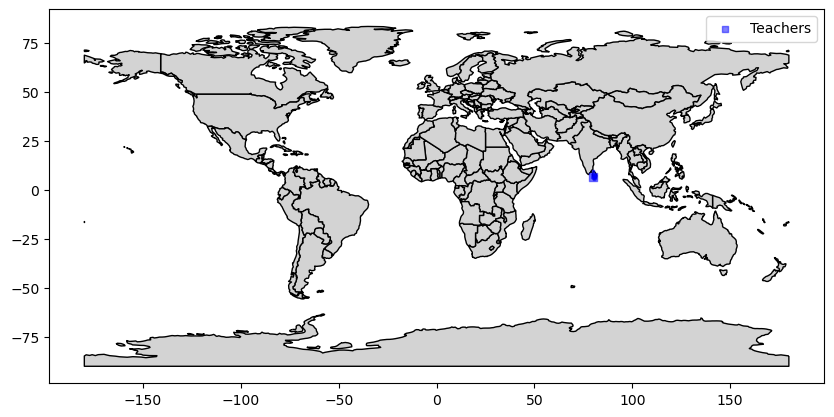

In [21]:
# Your data (replace this with your actual DataFrame)
data = {
    'District': ['Colombo', 'Gampaha', 'Kalutara', 'Kandy', 'Matale', 'Nuwara Eliya', 'Galle', 'Matara', 'Hambantota', 'Jaffna', 'Batticaloa', 'Kurunegala', 'Puttalam', 'Anuradhapura', 'Badulla', 'Moneragala', 'Ratnapura', 'Kegalle'],
    'Latitude': [6.94, 7.09, 6.58, 7.3, 7.47, 6.97, 6.04, 5.95, 6.13, 9.67, 7.71, 7.75, 8.05, 8.31, 6.98, 6.87, 6.69, 7.25],
    'Longitude': [79.85, 79.99, 79.96, 80.64, 80.62, 80.78, 80.22, 80.54, 81.11, 80.01, 81.69, 80.25, 79.93, 80.41, 81.06, 81.35, 80.4, 80.34],
    'Students_Total': [66610, 22110, 8138, 10460, 1014, 1786, 419, 4993, 1132, 8653, 43, 877, 98, 477, 2643, 92, 717, 82],
    'Teachers_Total': [3277, 970, 342, 608, 50, 77, 42, 220, 64, 356, 8, 62, 18, 29, 138, 21, 24, 11]
}

df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

gdf.plot(ax=ax, marker='s', color='blue', markersize=gdf['Teachers_Total'] / 100, alpha=0.5, label='Teachers')

# Show legend and display the plot
plt.legend()
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_17444\1652985650.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


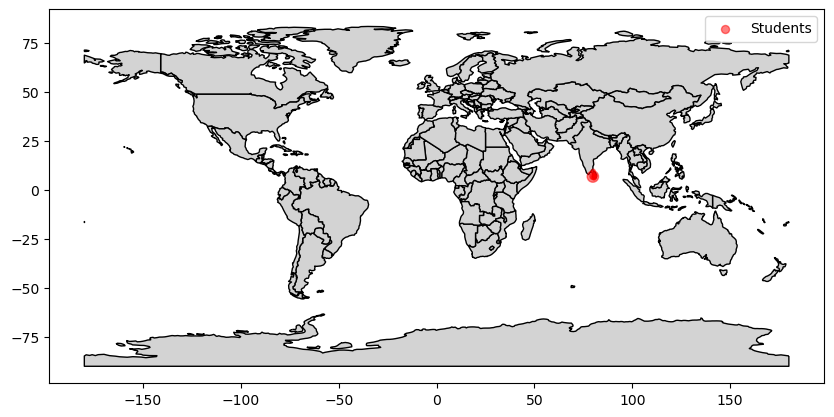

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
# Your data (replace this with your actual DataFrame)
data = {
    'District': ['Colombo', 'Gampaha', 'Kalutara', 'Kandy', 'Matale', 'Nuwara Eliya', 'Galle', 'Matara', 'Hambantota', 'Jaffna', 'Batticaloa', 'Kurunegala', 'Puttalam', 'Anuradhapura', 'Badulla', 'Moneragala', 'Ratnapura', 'Kegalle'],
    'Latitude': [6.94, 7.09, 6.58, 7.3, 7.47, 6.97, 6.04, 5.95, 6.13, 9.67, 7.71, 7.75, 8.05, 8.31, 6.98, 6.87, 6.69, 7.25],
    'Longitude': [79.85, 79.99, 79.96, 80.64, 80.62, 80.78, 80.22, 80.54, 81.11, 80.01, 81.69, 80.25, 79.93, 80.41, 81.06, 81.35, 80.4, 80.34],
    'Students_Total': [66610, 22110, 8138, 10460, 1014, 1786, 419, 4993, 1132, 8653, 43, 877, 98, 477, 2643, 92, 717, 82],
    'Teachers_Total': [3277, 970, 342, 608, 50, 77, 42, 220, 64, 356, 8, 62, 18, 29, 138, 21, 24, 11]
}

df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

# Plot your data
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Students_Total'] / 1000, alpha=0.5, label='Students')

# Show legend and display the plot
plt.legend()
plt.show()

# part 04

In [54]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
# Assuming df is your DataFrame with the district information
# df = pd.read_csv('your_dataset.csv')

# Extract relevant feature
X = df[['Students_Total']]

# Specify the number of clusters (you can adjust this based on your needs)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster_students'] = kmeans.fit_predict(X)

# Display the predicted clusters
print(df[['District', 'Students_Total', 'cluster_students']])


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        District  Students_Total  cluster_students
0        Colombo         66610.0                 1
1        Gampaha         22110.0                 2
2       Kalutara          8138.0                 2
3          Kandy         10460.0                 2
4         Matale          1014.0                 0
5   Nuwara Eliya          1786.0                 0
6          Galle           419.0                 0
7         Matara          4993.0                 0
8     Hambantota          1132.0                 0
9         Jaffna          8653.0                 2
10    Batticaloa            43.0                 0
11    Kurunegala           877.0                 0
12      Puttalam            98.0                 0
13  Anuradhapura           477.0                 0
14       Badulla          2643.0                 0
15    Moneragala            92.0                 0
16     Ratnapura           717.0                 0
17       Kegalle            82.0                 0


In [61]:
# Convert 'Students_Total' column to numeric
df['Students_Total'] = pd.to_numeric(df['Students_Total'], errors='coerce')

# Assuming you have already trained the K-means model and added the 'cluster_students' column to your DataFrame

# Find the cluster for a district with Students_Total = 3000
new_district_students_total = float(input('Enter the amount of student total you are expecting: '))
predicted_cluster = kmeans.predict([[new_district_students_total]])[0]

# Find the district in the predicted cluster with the closest Students_Total value
cluster_df = df[df['cluster_students'] == predicted_cluster]
suitable_district_index = (cluster_df['Students_Total'] - new_district_students_total).abs().idxmin()
suitable_district = df.loc[suitable_district_index, ['District', 'Students_Total']]

print("Most Suitable District for Students_Total =", new_district_students_total)
print(suitable_district)


Enter the amount of student total you are expecting: 40000
Most Suitable District for Students_Total = 40000.0
District          Colombo
Students_Total    66610.0
Name: 0, dtype: object


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
